# Spam Classification

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We have our SpamBase data here. It contains **4601 letters**, and **39,4%** of them are **spam**. The table also store some interesting **features** of every letter to detect whether it's a spam one or not.

**How you can group letters' features ?**: It can be divided into some **groups**. First _48_ features are checking how many words in the letter match the special spam-detecter WORD which is named in the feature itself(those can be divided into 3 groups: words, numbers and special symbols like **$,[**. Then there go _6_ features that describe the same but with only one special CHAR. The next _3_ features are concerning capital characters. And the last one shows whether a letter a spam or not (binary feature).

In [6]:
# Reading the data
# How many letters in a dataset ?
# Which portion of them is bad (spam) ?
import pandas as pd
from urllib.request import urlopen 

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = []
for line in urlopen(SPAMBASE_NAMES_URL).readlines()[33:]:
    feature_names.append(line.decode("utf-8").strip().split(':')[0])
spam_data = pandas.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
print (spam_data.shape[0], spam_data.spam.sum()/spam_data.shape[0] * 100, '%') 
spam_data.head(5)

4601 39.404477287546186 %


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Classifier training and its evaluation

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


Now let's try to apply classifiers on this data. At first we split it into two samples - train (65%) and test (35%). Then we use decision tree, giving it our train set. And after that, we let our tree classify the test set. And the last step - calculating the quality metrics (accuracy, precision, recall, f1) in order to understand if this classifier is any good. The problem with this classifying was splitting - consequently choosing train and test sets produces bad results, because of the sorted data beforehand and there can be an element of overfitting. The answer to that is shuffling the data before or along with splitting, which will mostly eliminate overfitting and yeild better results. And that's what we're going to do next.

In [4]:
# Split dataset into to disjoint subsets: train - first 3000 examples (≈65%), test - all others
# Train decesion tree with train. Classify examples from test. Calculate classification quality metrics,
# described above: Accuracy, Precision, Recall, F1. [Recommended parameters: split criteria - gini, max_depth: 7]
# Which drawbacks does evaluation on this test have? How you can make evalution more informative?
X_train = spam_data.head(3000).drop('spam', axis = 1)
X_test = spam_data[3000:len(spam_data)].drop('spam', axis = 1)
y_train = spam_data.spam.head(3000)
y_test = spam_data.spam[3000:len(spam_data)]

clf = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_pred,y_test), precision_recall_fscore_support(y_pred, y_test)

C:\Users\Константин\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.76889444097439097,
 (array([ 0.76889444,  0.        ]),
  array([ 1.,  0.]),
  array([ 0.86935028,  0.        ]),
  array([1231,  370], dtype=int64)))

So as I've mentioned just now we have to shuffle the data before splitting and run the experiment again. And, hooray, quality metrics have strongly raised up to 90%! So shuffling is vital to get a better result (ecpecially for this dataset). We'll be using these train and tests sets from now on.

In [5]:
# Repeat experiment with dataset shuffled before split.
X_train, X_test, y_train, y_test = train_test_split(spam_data.drop('spam',axis = 1),spam_data.spam, train_size = 3000, random_state = 0)

clf = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test), precision_recall_fscore_support(y_pred, y_test)

(0.91380387257963769,
 (array([ 0.94111462,  0.87384615]),
  array([ 0.9160696 ,  0.91025641]),
  array([ 0.92842324,  0.89167975]),
  array([977, 624], dtype=int64)))

Now let's see which features bring the most importance to the classifier? I found out that the most important was the one that checked letters for '[', it contains up to 40% of the decision.

In [16]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, most_important_features[f], clf.feature_importances_[most_important_features[f]]))           

1. feature 51 (0.411666)
2. feature 6 (0.130717)
3. feature 54 (0.125566)
4. feature 15 (0.059634)
5. feature 24 (0.052735)
6. feature 45 (0.036334)
7. feature 52 (0.029212)
8. feature 41 (0.019658)
9. feature 56 (0.017718)
10. feature 16 (0.016197)
11. feature 26 (0.016174)
12. feature 4 (0.015031)
13. feature 7 (0.013889)
14. feature 29 (0.009295)
15. feature 49 (0.009193)
16. feature 20 (0.006020)
17. feature 23 (0.005464)
18. feature 43 (0.004544)
19. feature 8 (0.004388)
20. feature 34 (0.003123)
21. feature 55 (0.002773)
22. feature 2 (0.002678)
23. feature 22 (0.002156)
24. feature 44 (0.001605)
25. feature 32 (0.001548)
26. feature 18 (0.001412)
27. feature 9 (0.001271)
28. feature 14 (0.000000)
29. feature 13 (0.000000)
30. feature 5 (0.000000)
31. feature 12 (0.000000)
32. feature 3 (0.000000)
33. feature 11 (0.000000)
34. feature 17 (0.000000)
35. feature 1 (0.000000)
36. feature 10 (0.000000)
37. feature 19 (0.000000)
38. feature 28 (0.000000)
39. feature 21 (0.000000)
40. 

Just a tree visualization

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=list(spam_data.drop('spam',axis = 1)))

In [18]:
!dot -Tpng tree.dot -o tree.png

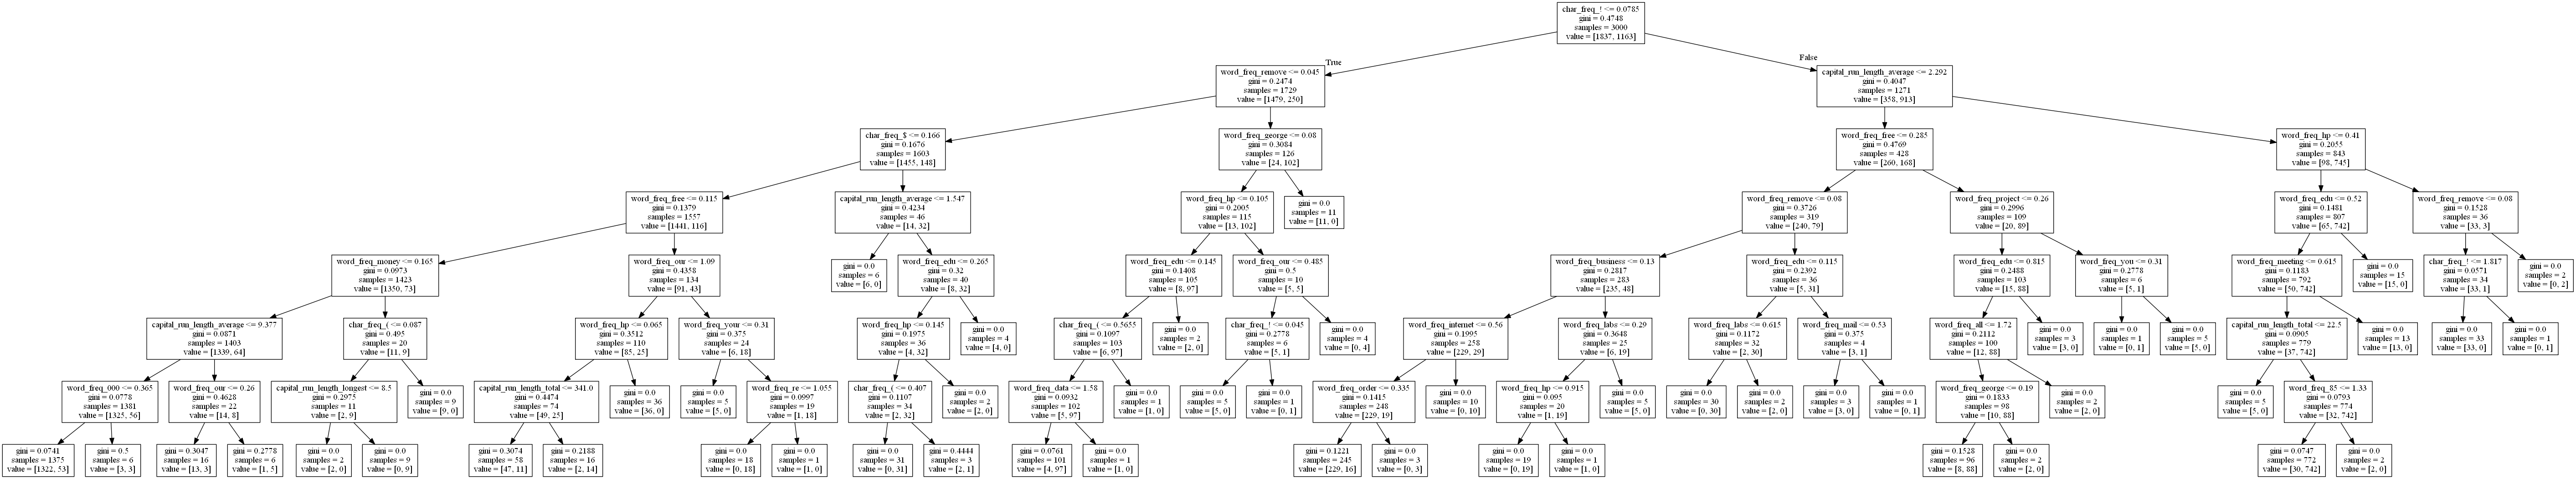

In [19]:
from IPython.display import Image
Image('tree.png')

Next, let's have a go on a constant classifier, which uses simple rules, just to check how good it is working with our data. It predicts only one class. I ran the test and it predicted right a little bit above 50% of the letters, which is not really a bad thing. But nobody should use it for real tasks. 
 
The last classifier is Kneighbors. Give it a go. The result of classifying is a bit lower than for three decicion classifier, - 80%, but still a high one. The last step is rescaling. It usually improves the resulting accuracy and the rest of the quiality metrics of classification. There is no use in applying rescaling for decision tree classifier, because it basically compares values and normalization of those won't make any difference in general. And exactly that conclusion we got after trying to apply rescaling to the treedecisionclassifier. But it's a good thinkg for KNN, both of rescaling (standart and maxmin) techinques got accuracy to 90%.
    
All in All, each of the classifier produces a good result, except for the constant one, which can't release any good things as it is just for a check before real classifiers. The best turned out to be a tree decision, but with preprocessing data Kneighbors reaches the same result.

In [37]:
#The rest of the questions of the 2 task.
import numpy as np
X_norm_train = preprocessing.scale(X_train) 
X_minmax_train = preprocessing.MinMaxScaler().fit_transform(X_train)
X_norm_test = preprocessing.scale(X_test)
X_minmax_test = preprocessing.MinMaxScaler().fit_transform(X_test)

Xtr = [X_train, X_norm_train, X_minmax_train]
Xte = [X_test, X_norm_test, X_minmax_test]

dummy = DummyClassifier(strategy = 'constant',constant = 0)
tree = DecisionTreeClassifier(max_depth=7)
knn = KNeighborsClassifier(n_neighbors = 10)

y_pred = acc = metrics =  [None]*7

#The metrics are calculated in order for these classifiers: 1) Constant 2) TreeDecision 3) TreeDecision with standard scaling
# 4) TreeDecision minmax scaling 5) KNN 6) KNN with standard scaling 7) KNN with minmax scaling
y_pred[0] = dummy.fit(X_train, y_train).predict(X_test)
metr = []
ac = []
for i,xtr,xte in zip(np.arange(3), Xtr, Xte):
    y_pred[i+1] = tree.fit(xtr, y_train).predict(xte)
    y_pred[i+4] = knn.fit(xtr,y_train).predict(xte)
for t in y_pred:
    metrics = precision_recall_fscore_support(t, y_test)
    acc = accuracy_score(t,y_test)
    b = np.asarray(metrics).flatten()
    metr.append(b)
    ac.append(acc)
    
index =  ('const0','tree','tree+scale','tree+minmax','knn','knn+scale','knn+minmax')
columns = ('prec0','prec1','recall0','recall1','f1_0','f1_1','sup0','sup1')
metric = pd.DataFrame(data = metr, index = index, columns = columns)
accuracy = pd.Series(data = ac, index = index)
metric['accuracy'] = accuracy
metric

C:\Users\Константин\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


,prec0,prec1,recall0,recall1,f1_0,f1_1,sup0,sup1,accuracy
const0,1.000000,0.000000,0.594004,0.000000,0.745298,0.000000,1601.0,0.0,0.594004
tree,0.941115,0.876923,0.917949,0.910543,0.929387,0.893417,975.0,626.0,0.915053
tree+scale,0.958991,0.826154,0.889756,0.932292,0.923077,0.876020,1025.0,576.0,0.905059
tree+minmax,0.925342,0.890769,0.925342,0.890769,0.925342,0.890769,951.0,650.0,0.911305
knn,0.879075,0.613846,0.769089,0.776265,0.820412,0.685567,1087.0,514.0,0.771393
knn+scale,0.951630,0.803077,0.876089,0.919014,0.912298,0.857143,1033.0,568.0,0.891318
knn+minmax,0.930599,0.818462,0.882353,0.889632,0.905834,0.852564,1003.0,598.0,0.885072


# Classification threshold selection

#### Which classifier has AUC-ROC near 0?
If AUC_ROC is very close to 0, it means that a classifier is doing an opposite to its intended job, which means classifying almost every object in a wrong way.
#### Is it correct, that classifier from previous part #2 to identify class compare some estimating with threshold? What are those estimations? What thresholds were chosen?
Yes, it's correct. In treeclassifier the values in the endning leaves are considered with some probability that we can derive for every and each case with predict_proba method, and for them a threshold is counted and after compared with, so to get a final decision. Gini impurity is working at that time, it counts those probabilities. 

In [27]:
# preparation for drawing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

y_pred1 = [dummy.fit(X_train, y_train).predict_proba(X_test),tree.fit(X_train,y_train).predict_proba(X_test),
           knn.fit(X_train,y_train).predict_proba(X_test),knn.fit(X_norm_train, y_train).predict_proba(X_norm_test)]

ROC = [[{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}]] # a list of 3 values fpr, tpr and roc_auc for 4 classifiers
PR = [[{}, {}, {}, {}], [{}, {}, {}, {}], [{}, {}, {}, {}]] # a list of 3 values precision, recall, and average_precision for 4 classifiers
#it looks awful, but I couldn't think of anything else exquisite enough to contain objects of different kinds
for i in range(2):
    for j in range(4):
        ROC[0][j][i], ROC[1][j][i], _ = roc_curve(y_test, y_pred1[j][:, i])
        ROC[2][j][i] = auc(ROC[0][j][i], ROC[1][j][i])
        PR[0][j][i], PR[1][j][i], _ = precision_recall_curve(y_test, y_pred1[j][:, i])
        PR[2][j][i] = average_precision_score(y_test, y_pred1[j][:, i])  

#### Drawing ROC, PR curves and comparing AUC.
Here I'm drawing ROC and PR curves, for every one of them a AUC value is shown on the legend. The best results got KNN with scaling as it can be seen from plots.

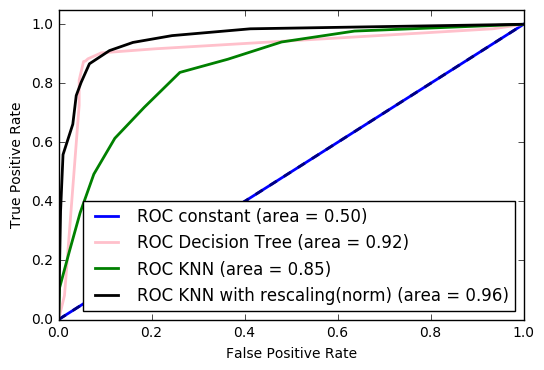

In [28]:
plt.figure()
lw = 2
labels = ['ROC constant (area = %0.2f)','ROC Decision Tree (area = %0.2f)',
         'ROC KNN (area = %0.2f)','ROC KNN with rescaling(norm) (area = %0.2f)']
colors = ['blue','pink','green','black']
for i,key,color in zip(range(4), labels, colors):
    plt.plot(ROC[0][i][1], ROC[1][i][1], color=color,
         lw=lw, label= key % ROC[2][i][1] )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
savefig('ROC1.png')
plt.show()

#### What maximal Recall of spam classification can models achive if you have strict constraint on precision: it should not be below 90%?

I've drawn the line for precision = 90%. And we should find the highest recall value that precision value on the line or above it. It's around 90% as well for two of the classifiers. And much less for others.

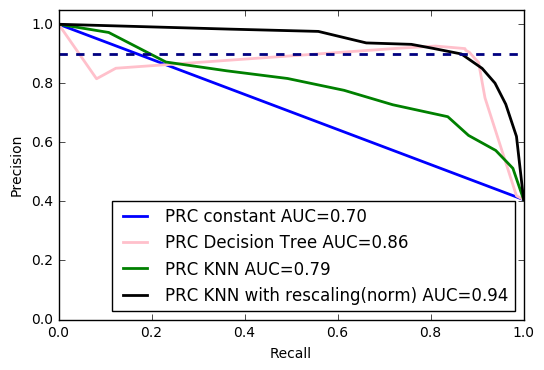

In [32]:
plt.figure()
lw = 2
labels = ['PRC constant AUC={0:0.2f}','PRC Decision Tree AUC={0:0.2f}',
         'PRC KNN AUC={0:0.2f}','PRC KNN with rescaling(norm) AUC={0:0.2f}']
colors = ['blue','pink','green','black']
for i,key,color in zip(range(4), labels, colors):
    plt.plot(PR[1][i][1], PR[0][i][1], color=color,
         lw=lw, label= key .format(PR[2][i][1]) )
plt.plot([0, 1], [0.9, 0.9], color='navy', lw=lw, linestyle='--')    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")
savefig('PC1.png')
plt.show()

# Cross-validation and parameter selection

Cross-validation is used for comparing models, while tuning parameters. There are several methods, I've used Kfold with 5 folds. And also it's applied only to a train set, test set stays unaltered the whole time. 

In [34]:
# Choose cross-validation method, one from described above. Fixate cross-validation split of train set.
# You should cross-validate on train samples from previous tasks, test should stay independent.
# Pay attention: when comparing models, cross-validation split must not change.
from sklearn.cross_validation import KFold
cv = KFold(n=len(y_train), n_folds=5, shuffle=True, random_state=123)

Then I've tried to find some parameters in a certain set of values for KNN and TreeDecision. It is really expensive in time, if you're making it go through a lot of combinations in big sets of feasible values. But i've tried to make those sets lower, and found some optimal parameters. They are changing a bit with every launch of search, but generally they stay almost the same. For KNN i've chosen to optimize metric, weights and amount of neighbors, for TreeDecision - maximal depth, criterion, maximal amount of features needed to classify and minimal samples for a leaf

In [35]:
#Choose one metric for optimization by grid search. Example: AUC-ROC.
#Find optimal set of parameters for tree with grid search. Parameters for grid: split criterion, max depth, number of features for node, min number of objects in the leaf (of only some of offered parameters)
#Find optimal set of parameters for KNN using grid search. Parameters for grid: K, metric, weight scheme.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


metrics = ('euclidean','manhattan','chebyshev','minkowski')
param_grid = {'max_depth': np.arange(3, 10), 'criterion': ('gini','entropy'),'max_features': np.arange(50, 58), 'min_samples_leaf': np.arange(1,5)}
param_grid1 = {'n_neighbors': np.arange(2, 10), 'weights': ('uniform', 'distance'), 'metric':metrics}

param_gr = [param_grid, param_grid1]
classifiers = [DecisionTreeClassifier(),KNeighborsClassifier()]
names = ['DecisionTree','KNeighbors']
for clf, p, name in zip(classifiers, param_gr, names):
    clf = GridSearchCV(clf, p, cv = cv)
    clf.fit(X_train,y_train)
    clf_preds = clf.predict_proba(X_test)[:, 1]
    clf_performance = roc_auc_score(y_test, clf_preds)
    print (name, ': Area under the ROC curve = {}'.format(clf_performance))
    print (clf.best_params_)

DecisionTree : Area under the ROC curve = 0.9375167839521152
{'min_samples_leaf': 1, 'max_features': 55, 'max_depth': 9, 'criterion': 'entropy'}
KNeighbors : Area under the ROC curve = 0.9096246865647496
{'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}
